In [24]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from models.scripts.utils import load_csv, split_date, create_lags, add_seasonality

In [25]:
file_path = 'data/btc_timeseries.csv'

df = load_csv(file_path)
df = split_date(df, 'time')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                38656 non-null  int64         
 1   time                     38656 non-null  datetime64[ns]
 2   open                     38656 non-null  float64       
 3   close                    38656 non-null  float64       
 4   high                     38656 non-null  float64       
 5   low                      38656 non-null  float64       
 6   volume                   29984 non-null  float64       
 7   volume_24h               38656 non-null  float64       
 8   market_cap               38656 non-null  float64       
 9   circulating_supply       38656 non-null  float64       
 10  url_shares               38656 non-null  float64       
 11  unique_url_shares        38656 non-null  float64       
 12  reddit_posts             37329 n

In [26]:
# Calculate the mean close price per month
monthly_mean = df.groupby(['month'])['close'].mean().reset_index()

In [27]:
def plot_monthly_mean(df, year, month, value):

    # Grouping by year and month to calculate the monthly mean
    monthly_mean = df.groupby([year, month])[value].mean().reset_index()

    # Creating a 'Year-Month' column for plotting
    monthly_mean['Year-Month'] = monthly_mean[year].astype(str) + '-' + monthly_mean[month].astype(str)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_mean, x='Year-Month', y=value, marker='o')

    plt.title(f'Mean {value} per Month')
    plt.xlabel('Month')
    plt.ylabel(f'Mean {value}')

    plt.xticks(rotation=45)  # Rotate the x labels for better readability
    plt.grid(True)

    plt.tight_layout()
    plt.show()


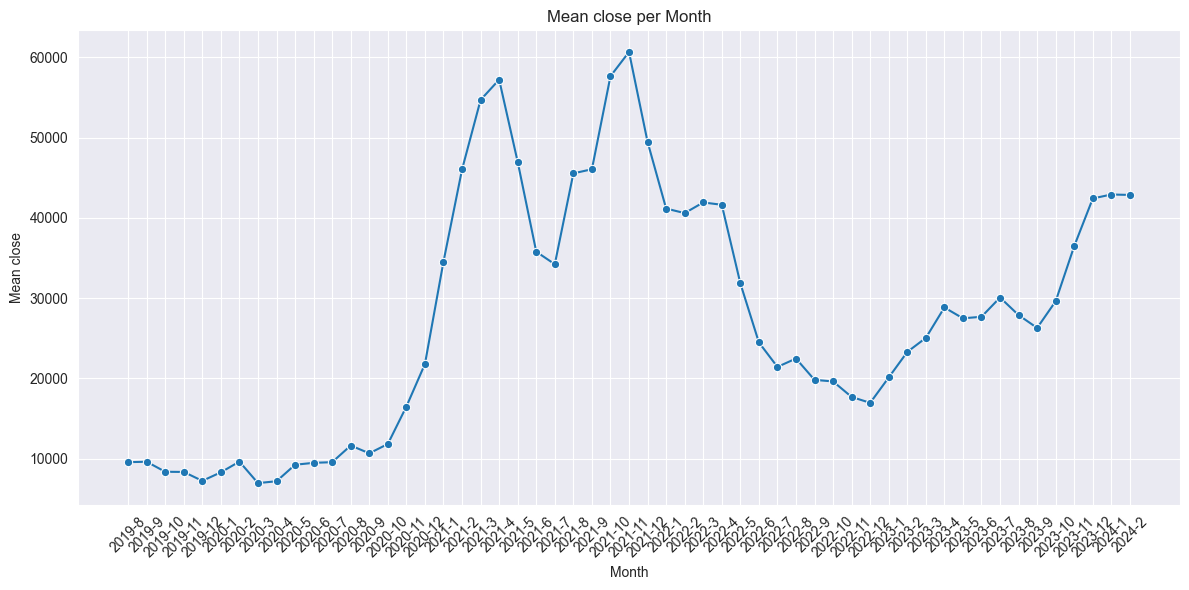

In [28]:
plot_monthly_mean(df, 'year', 'month', 'close')

### Correlation Matrix

In [42]:
def plot_correlation_matrix(correlation_matrix, features):
    
    # Plotting the correlation matrix
    plt.figure(figsize=(50, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

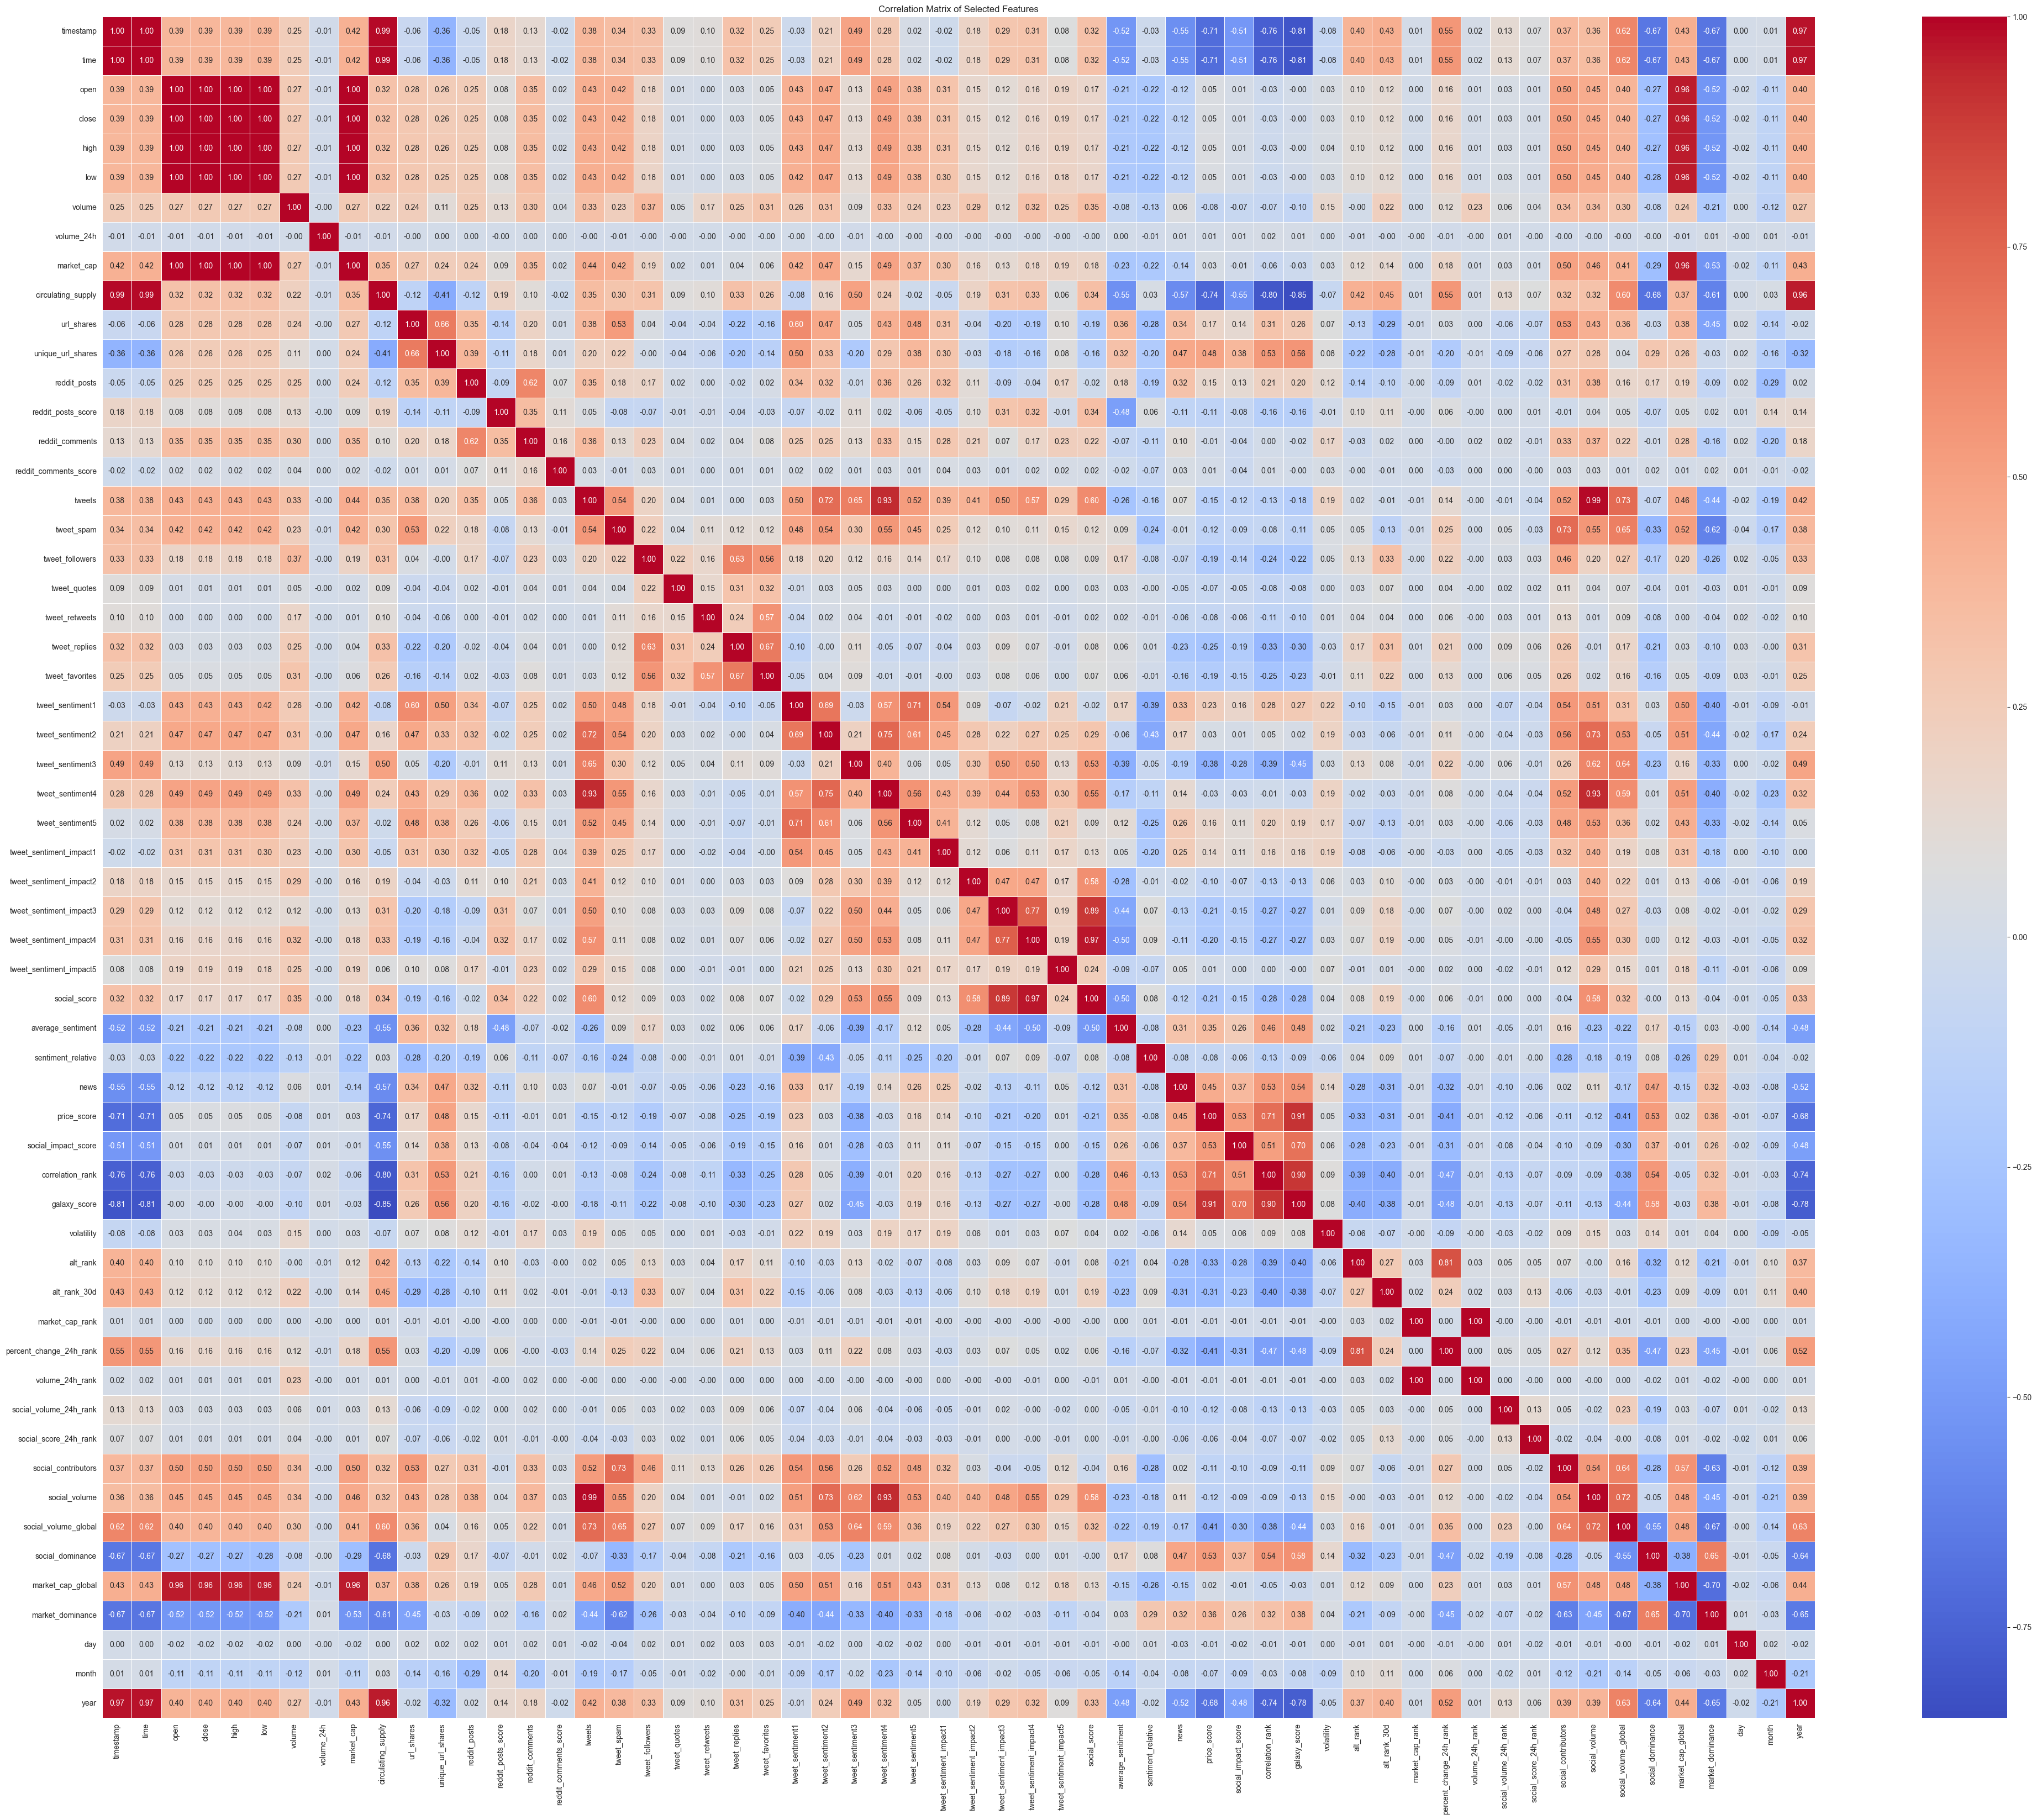

In [43]:
features_to_analyze = ['open', 'close', 'high', 'low', 'volume', 'tweets', 'social_score', 'social_score', 'average_sentiment', 'galaxy_score', 'social_volume']
features = df.columns

correlation_matrix = df.corr()
plot_correlation_matrix(correlation_matrix, features)

In [45]:
target_feature = "close"
target_correlations = correlation_matrix[target_feature]
sorted_correlations = target_correlations.sort_values(ascending=False)
sorted_correlations = sorted_correlations.drop(labels=[target_feature])

sorted_correlations

open                       0.999973
high                       0.999919
low                        0.999903
market_cap                 0.999389
market_cap_global          0.957627
social_contributors        0.496310
tweet_sentiment4           0.488426
tweet_sentiment2           0.468221
social_volume              0.450366
tweets                     0.432601
tweet_sentiment1           0.425305
tweet_spam                 0.415469
year                       0.403253
social_volume_global       0.395595
timestamp                  0.387234
time                       0.387234
tweet_sentiment5           0.376889
reddit_comments            0.350076
circulating_supply         0.322129
tweet_sentiment_impact1    0.306558
url_shares                 0.282745
volume                     0.268414
unique_url_shares          0.255048
reddit_posts               0.252845
tweet_sentiment_impact5    0.185318
tweet_followers            0.184046
social_score               0.169123
tweet_sentiment_impact4    0

### Fourier Transform

In [10]:
# Fourier Transform
from numpy.fft import rfft

# Choose a relevant column, for example, 'Close'
data = df['close'].values

# Apply Fourier Transform
fourier_transform = rfft(data)

# Get frequencies
frequencies = np.fft.rfftfreq(len(data), d=1)  # d is the sample spacing
amplitudes = np.abs(fourier_transform)

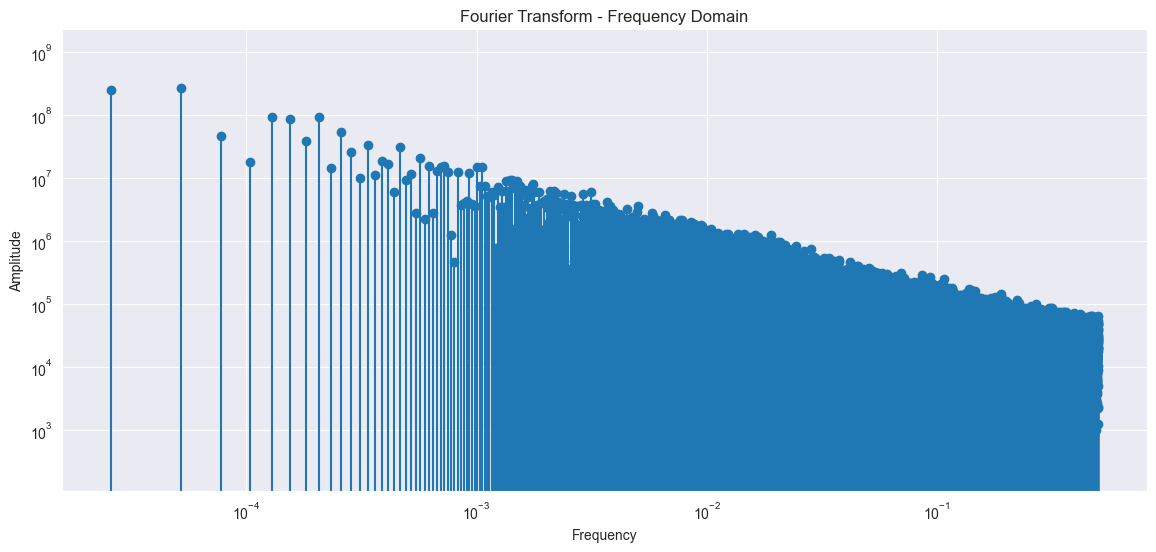

In [11]:
plt.figure(figsize=(14, 6))
plt.stem(frequencies, amplitudes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Domain')
plt.show()

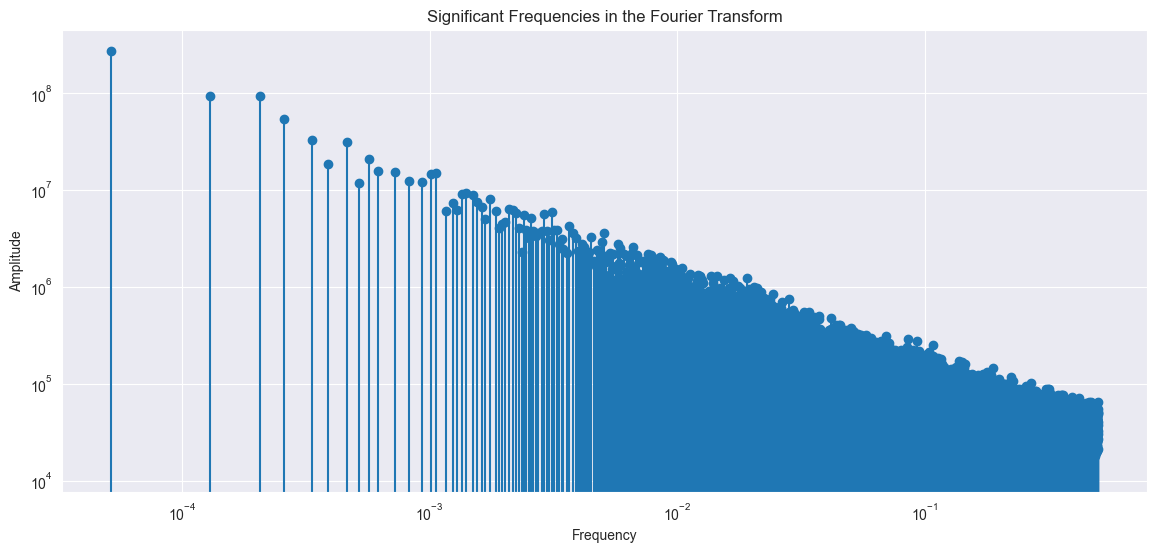

Frequency: 5.173841059602649e-05, Period: 19328.0 (time units)
Frequency: 0.00012934602649006624, Period: 7731.2 (time units)
Frequency: 0.00020695364238410596, Period: 4832.0 (time units)
Frequency: 0.00025869205298013247, Period: 3865.6 (time units)
Frequency: 0.00033629966887417217, Period: 2973.538461538462 (time units)
Frequency: 0.00038803807947019865, Period: 2577.0666666666666 (time units)
Frequency: 0.0004656456953642384, Period: 2147.5555555555557 (time units)
Frequency: 0.0005173841059602649, Period: 1932.8 (time units)
Frequency: 0.0005691225165562914, Period: 1757.0909090909092 (time units)
Frequency: 0.0006208609271523179, Period: 1610.6666666666665 (time units)
Frequency: 0.0007243377483443709, Period: 1380.5714285714284 (time units)
Frequency: 0.0008278145695364238, Period: 1208.0 (time units)
Frequency: 0.0009312913907284768, Period: 1073.7777777777778 (time units)
Frequency: 0.0010088990066225165, Period: 991.1794871794872 (time units)
Frequency: 0.001060637417218543,

In [12]:
from scipy.signal import find_peaks

# Find Peaks in the Amplitudes to Identify Significant Frequencies
peaks, _ = find_peaks(amplitudes, height=0)  # Adjust height as needed to filter out noise

# Extract Frequencies corresponding to the Peaks
significant_freqs = frequencies[peaks]
significant_amps = amplitudes[peaks]

# Optional - Plot the Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies in the Fourier Transform')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

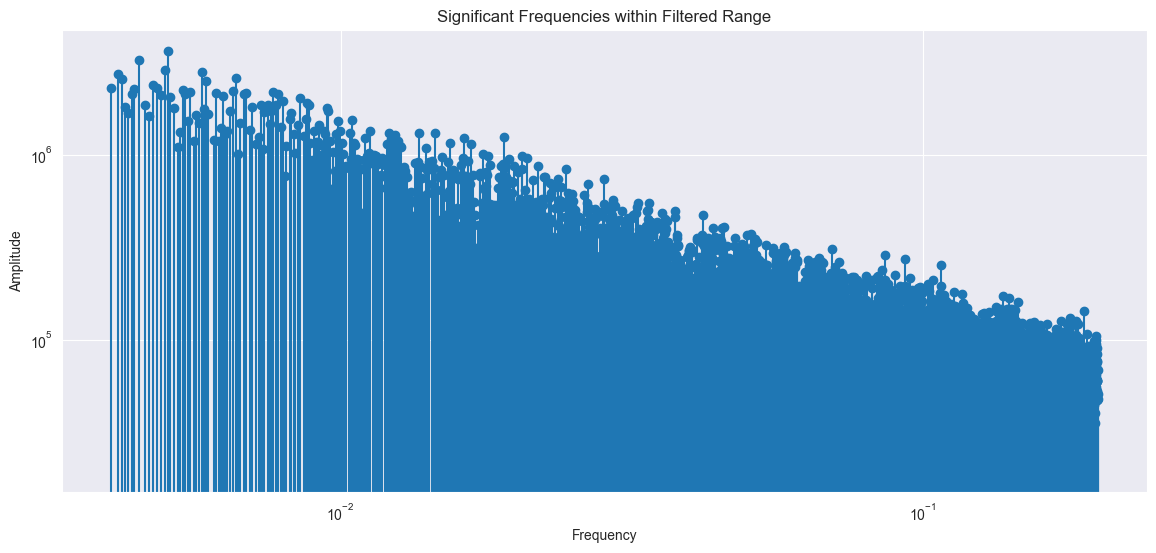

Frequency: 0.004035596026490066, Period: 247.7948717948718 (time units)
Frequency: 0.0041390728476821195, Period: 241.6 (time units)
Frequency: 0.004216680463576159, Period: 237.15337423312883 (time units)
Frequency: 0.0042684188741721855, Period: 234.27878787878788 (time units)
Frequency: 0.004320157284768212, Period: 231.47305389221555 (time units)
Frequency: 0.004371895695364238, Period: 228.7337278106509 (time units)
Frequency: 0.004423634105960265, Period: 226.05847953216374 (time units)
Frequency: 0.004501241721854304, Period: 222.1609195402299 (time units)
Frequency: 0.004604718543046358, Period: 217.1685393258427 (time units)
Frequency: 0.004682326158940397, Period: 213.5690607734807 (time units)
Frequency: 0.004759933774834437, Period: 210.08695652173913 (time units)
Frequency: 0.004837541390728477, Period: 206.71657754010693 (time units)
Frequency: 0.0049151490066225165, Period: 203.45263157894738 (time units)
Frequency: 0.004992756622516557, Period: 200.29015544041448 (time 

In [13]:
# Define Frequency Range for Filtering
min_freq = 1 / 252
max_freq = 1 / 5

# Filter out frequencies outside this range
filtered_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))
filtered_freqs = frequencies[filtered_indices]
filtered_amps = amplitudes[filtered_indices]

# Find Peaks within the Filtered Frequencies
peaks, _ = find_peaks(filtered_amps, height=0)  # Adjust height as needed

# Extract Frequencies and Amplitudes of the Peaks
significant_freqs = filtered_freqs[peaks]
significant_amps = filtered_amps[peaks]

# Plot the Filtered Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies within Filtered Range')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [14]:
# Convert Frequencies to Periods
significant_periods = 1 / significant_freqs

monthly_range = range(17, 23)
# yearly_range = range(245, 256)

# Interpretation
for freq, period in zip(significant_freqs, significant_periods):
    # Approximate the period to the nearest integer for easier interpretation
    approx_period = round(period)

    if approx_period in monthly_range:
        print(f"Frequency: {freq} - Pattern with period of {approx_period} days")

Frequency: 0.04449503311258278 - Pattern with period of 22 days
Frequency: 0.044546771523178805 - Pattern with period of 22 days
Frequency: 0.04459850993377484 - Pattern with period of 22 days
Frequency: 0.04465024834437086 - Pattern with period of 22 days
Frequency: 0.0447278559602649 - Pattern with period of 22 days
Frequency: 0.044779594370860924 - Pattern with period of 22 days
Frequency: 0.04485720198675497 - Pattern with period of 22 days
Frequency: 0.044908940397350994 - Pattern with period of 22 days
Frequency: 0.04496067880794702 - Pattern with period of 22 days
Frequency: 0.045012417218543044 - Pattern with period of 22 days
Frequency: 0.045064155629139076 - Pattern with period of 22 days
Frequency: 0.04514176324503311 - Pattern with period of 22 days
Frequency: 0.04519350165562914 - Pattern with period of 22 days
Frequency: 0.04524524006622516 - Pattern with period of 22 days
Frequency: 0.045296978476821195 - Pattern with period of 22 days
Frequency: 0.04534871688741722 - Pa

/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


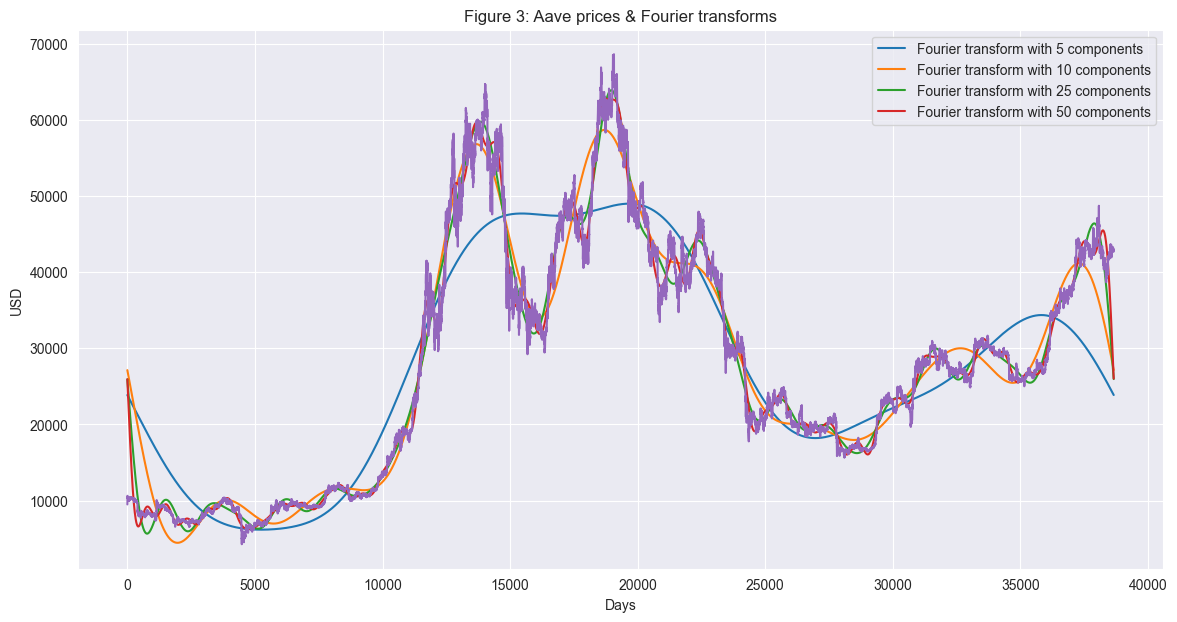

In [15]:
close_fft = np.fft.fft(np.asarray(df['close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [5, 10, 25, 50]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot( df['close'])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Aave prices & Fourier transforms')
plt.legend()
plt.show()

### Lag Features

In [16]:
lag_df = create_lags(df, 3)

In [17]:
lag_df.head()

,Unnamed: 0,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,market_cap_global,market_dominance,daily_price_change,week,day,month,year,lag_1,lag_2,lag_3
0,0,1567036800,2019-08-29,9699.30,9492.81,9709.59,9344.69,414776885.0,2.119802e+10,1.704075e+11,...,2.332637e+11,66.321895,-206.49,35,29,8,2019,9492.81,9492.81,9492.81
1,1,1567123200,2019-08-30,9453.74,9587.25,9699.85,9368.27,414776885.0,2.119802e+10,1.721211e+11,...,2.332637e+11,66.321895,133.51,35,30,8,2019,9492.81,9492.81,9492.81
2,2,1567209600,2019-08-31,9603.96,9624.54,9714.11,9512.03,414776885.0,2.119802e+10,1.724485e+11,...,2.332637e+11,66.321895,20.58,35,31,8,2019,9587.25,9492.81,9492.81
3,3,1567296000,2019-09-01,9646.58,9768.36,9823.53,9578.66,414776885.0,2.119802e+10,1.748100e+11,...,2.332637e+11,66.321895,121.78,35,1,9,2019,9624.54,9587.25,9492.81
4,4,1567382400,2019-09-02,9783.44,10387.50,10459.00,9764.76,414776885.0,2.119802e+10,1.854709e+11,...,2.332637e+11,66.321895,604.06,36,2,9,2019,9768.36,9624.54,9587.25


### Seasonality Index

In [18]:
df = add_seasonality(df)
df.head(100)

,Unnamed: 0,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,market_cap_global,market_dominance,daily_price_change,week,day,month,year,Month_Category_Bearish,Month_Category_Bullish,Month_Category_Normal
0,0,1567036800,2019-08-29 00:00:00,9699.300000,9492.810000,9709.590000,9344.690000,414776885.0,2.119802e+10,1.704075e+11,...,2.332637e+11,66.321895,-206.490000,35,29,8,2019,0.0,1.0,0.0
1,1,1567123200,2019-08-30 00:00:00,9453.740000,9587.250000,9699.850000,9368.270000,414776885.0,2.119802e+10,1.721211e+11,...,2.332637e+11,66.321895,133.510000,35,30,8,2019,0.0,1.0,0.0
2,2,1567209600,2019-08-31 00:00:00,9603.960000,9624.540000,9714.110000,9512.030000,414776885.0,2.119802e+10,1.724485e+11,...,2.332637e+11,66.321895,20.580000,35,31,8,2019,0.0,1.0,0.0
3,3,1567296000,2019-09-01 00:00:00,9646.580000,9768.360000,9823.530000,9578.660000,414776885.0,2.119802e+10,1.748100e+11,...,2.332637e+11,66.321895,121.780000,35,1,9,2019,0.0,0.0,1.0
4,4,1567382400,2019-09-02 00:00:00,9783.440000,10387.500000,10459.000000,9764.760000,414776885.0,2.119802e+10,1.854709e+11,...,2.332637e+11,66.321895,604.060000,36,2,9,2019,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1568257200,2019-09-12 03:00:00,10126.783574,10123.956512,10134.578343,10113.247170,431431662.0,2.119802e+10,1.814451e+11,...,2.332637e+11,66.321895,-2.827062,37,12,9,2019,0.0,0.0,1.0
96,96,1568260800,2019-09-12 04:00:00,10119.401685,10089.269736,10125.283081,10089.269736,441372460.0,2.119802e+10,1.809910e+11,...,2.332637e+11,66.321895,-30.131949,37,12,9,2019,0.0,0.0,1.0
97,97,1568264400,2019-09-12 05:00:00,10090.256458,10095.272037,10107.537798,10087.981847,430388565.0,2.119802e+10,1.809769e+11,...,2.332637e+11,66.321895,5.015579,37,12,9,2019,0.0,0.0,1.0
98,98,1568268000,2019-09-12 06:00:00,10081.617342,10072.282818,10082.009704,10054.583066,471037665.0,2.119802e+10,1.805735e+11,...,2.332637e+11,66.321895,-9.334524,37,12,9,2019,0.0,0.0,1.0


## Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

In [19]:
df.set_index('time', inplace=True)
monthly_df = df['close'].resample('M').mean()

In [20]:
monthly_df

time
2019-08-31     9568.200000
2019-09-30     9621.019575
2019-10-31     8371.972543
2019-11-30     8349.234606
2019-12-31     7238.831507
2020-01-31     8304.822052
2020-02-29     9637.493566
2020-03-31     6957.718110
2020-04-30     7192.063231
2020-05-31     9246.332604
2020-06-30     9484.078519
2020-07-31     9567.805813
2020-08-31    11642.423701
2020-09-30    10670.914320
2020-10-31    11833.097239
2020-11-30    16502.494029
2020-12-31    21801.868929
2021-01-31    34564.272850
2021-02-28    46042.071811
2021-03-31    54710.180112
2021-04-30    57234.253881
2021-05-31    46978.962788
2021-06-30    35791.998056
2021-07-31    34233.457155
2021-08-31    45555.419178
2021-09-30    46071.025918
2021-10-31    57660.824993
2021-11-30    60683.917766
2021-12-31    49483.952386
2022-01-31    41172.355117
2022-02-28    40603.824585
2022-03-31    41932.135794
2022-04-30    41641.198161
2022-05-31    31864.717891
2022-06-30    24493.027039
2022-07-31    21438.163167
2022-08-31    22480.913

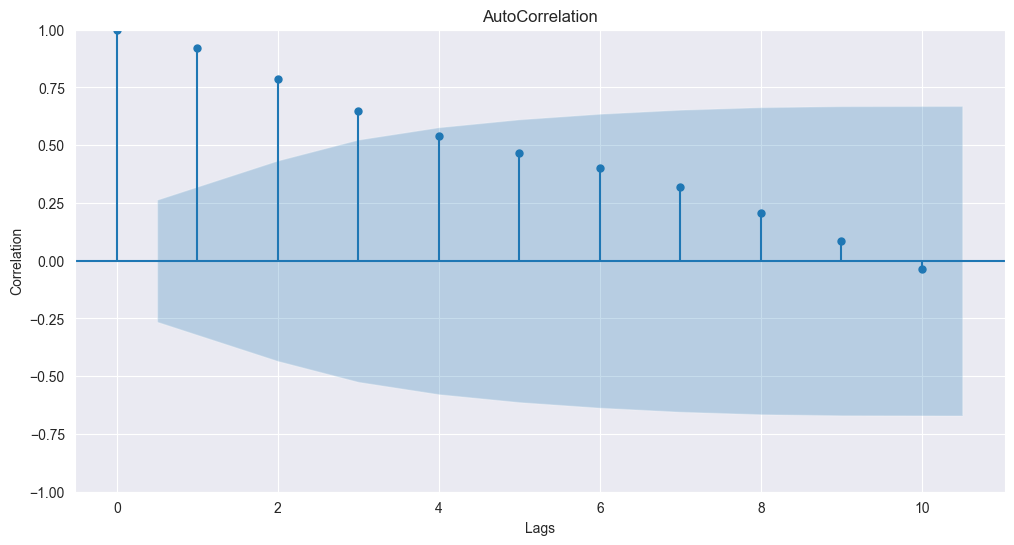

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

# AutoCorrelation
plot_acf(monthly_df, lags=10, ax=ax) 
ax.set_title('AutoCorrelation')
ax.set_ylabel('Correlation')
ax.set_xlabel('Lags')

plt.show()

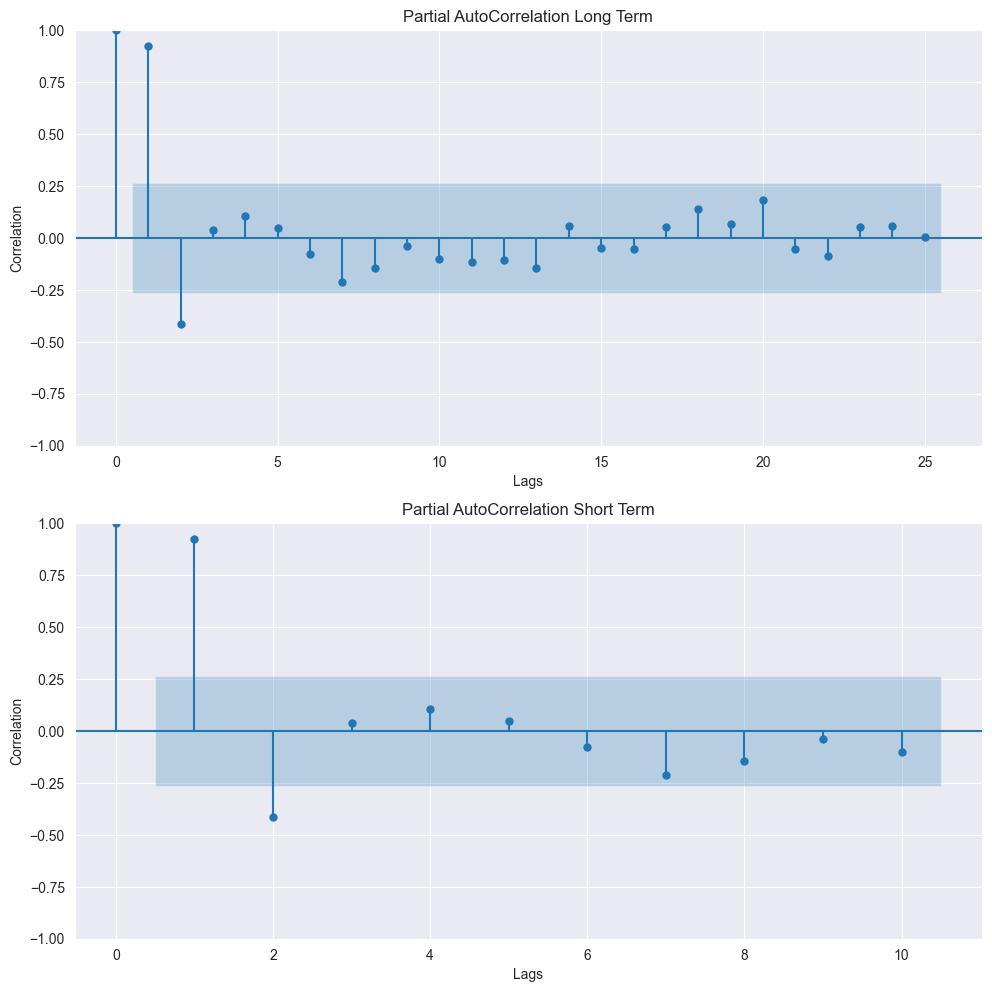

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Partial AutoCorrelation for Long Term
pacf = plot_pacf(monthly_df, lags=25, ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Partial AutoCorrelation for Short Term
pacf = plot_pacf(monthly_df, lags=10, ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)
plt.show()